Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Error: File not found. Please check the file path.
Error: File not found at the specified path. Please check the file path and try again.
   Other
0      7
1      8
2      9
First few rows after dropping empty columns:
   Other
0      7
1      8
2      9
First few rows of the dataset:
   Other
0      7
1      8
2      9

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Other   3 non-null      int64
dtypes: int64(1)
memory usage: 152.0 bytes
None

Summary statistics:
       Other
count    3.0
mean     8.0
std      1.0
min      7.0
25%      7.5
50%      8.0
75%      8.5
max      9.0

Missing values per column:
Other    0
dtype: int64


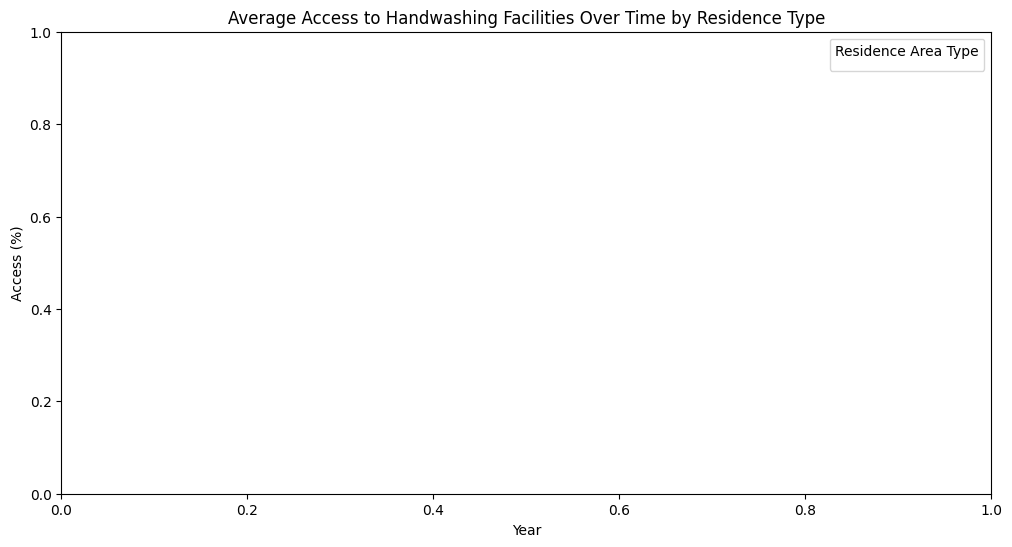

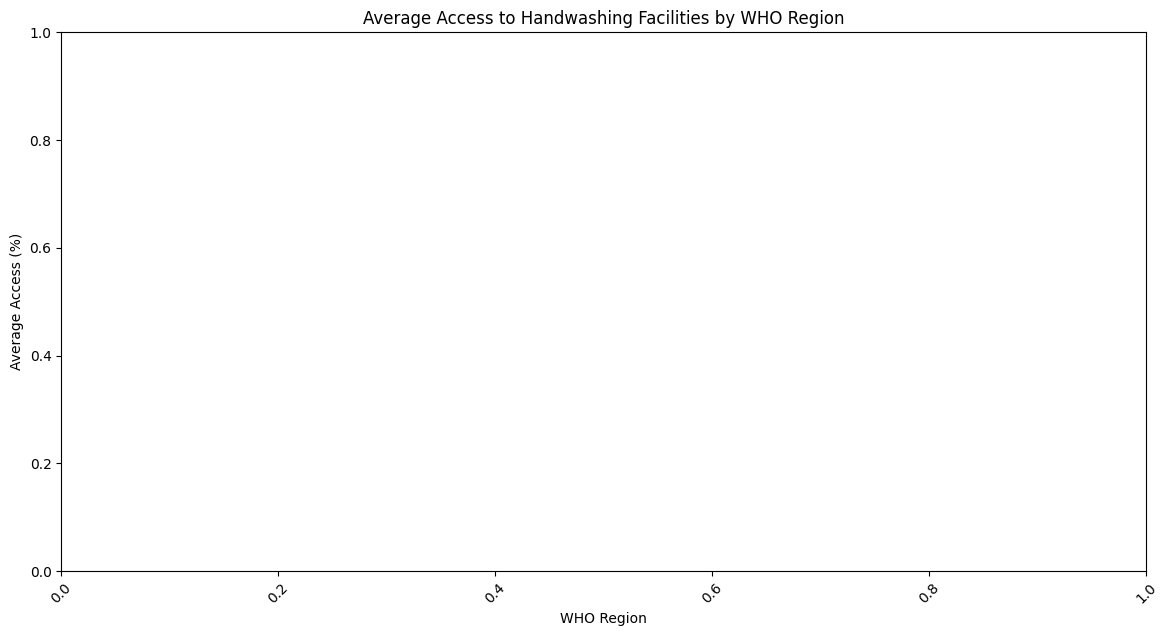

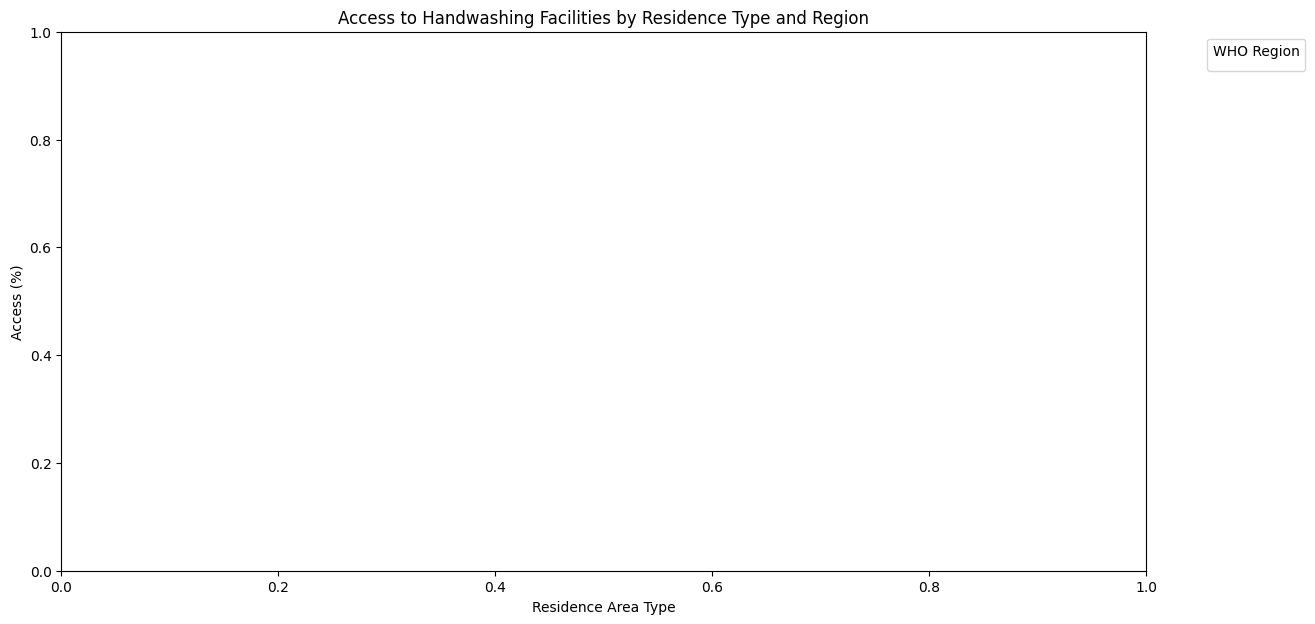

Index(['Other'], dtype='object')
Index(['Other'], dtype='object')
Index(['Other'], dtype='object')


KeyError: 'Year'

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import pandas as pd
import os

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Check if the file exists in the specified path
file_path = '/content/drive/My Drive/Handwashing with soap.csv'

# Verify if the file path is correct
if os.path.exists(file_path):
    print("File found. Proceeding to load.")
    try:
        # Step 3: Load the dataset with encoding
        data = pd.read_csv(file_path, encoding='utf-8')
        print("Dataset loaded successfully!")
        print("First few rows of the dataset:")
        print(data.head())
    except Exception as e:
        print(f"An error occurred while loading the file: {e}")
else:
    print("Error: File not found. Please check the file path.")


# Step 3: Check if the file exists
if os.path.exists(file_path):
    print("File found. Proceeding to load...")
    try:
        # Attempt to load the dataset
        data = pd.read_csv(file_path, encoding='utf-8')
        print("Dataset loaded successfully!")
        print("First few rows of the dataset:")
        print(data.head())
    except Exception as e:
        print(f"An error occurred while loading the file: {e}")
else:
    print("Error: File not found at the specified path. Please check the file path and try again.")



# Define the data
data = pd.DataFrame({
    'Low': [1, 2, 3],
    'High': [4, 5, 6],
    'Comments': ['A', 'B', 'C'],
    'Other': [7, 8, 9]
})

# Now drop the columns
data = data.drop(columns=['Low', 'High', 'Comments'], errors='ignore')

# Check the result
print(data)


# Display the first few rows to confirm changes
print("First few rows after dropping empty columns:")
print(data.head())


# Display initial data overview
print("First few rows of the dataset:")
print(data.head())
print("\nDataset information:")
print(data.info())
print("\nSummary statistics:")
print(data.describe())

# Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())

# Exploratory Data Analysis (EDA)

# 1. Trend analysis: Average handwashing facility access over time
plt.figure(figsize=(12, 6))
plt.title("Average Access to Handwashing Facilities Over Time by Residence Type")
plt.xlabel("Year")
plt.ylabel("Access (%)")
plt.legend(title="Residence Area Type")
plt.show()

# 2. Regional comparison: Average access to handwashing facilities by WHO region
plt.figure(figsize=(14, 7))
plt.title("Average Access to Handwashing Facilities by WHO Region")
plt.xlabel("WHO Region")
plt.ylabel("Average Access (%)")
plt.xticks(rotation=45)
plt.show()

# 3. Access by residence type (Urban, Rural, Total) across regions
plt.figure(figsize=(14, 7))
plt.title("Access to Handwashing Facilities by Residence Type and Region")
plt.xlabel("Residence Area Type")
plt.ylabel("Access (%)")
plt.legend(title="WHO Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Check and clean column names
data.columns = data.columns.str.strip()
print(data.columns)
print(data.columns)


# Step 1: Check if 'Year' exists and view the first few values
print(data.columns)  # Check column names
print(data['Year'].head())  # Check the first few entries in 'Year'

# Step 2: Ensure 'Year' is numeric, coercing errors to NaN
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

# Step 3: Check the data type of 'Year' and verify conversion
print(data['Year'].dtype)

# Step 4: Drop rows with NaN values in 'Year'
data = data.dropna(subset=['Year'])

# Step 5: Print the first few rows to ensure changes
print(data.head())

# Step 1: Check column names and strip any spaces
print("Columns:", data.columns)

data.columns = data.columns.str.strip()  # Remove leading/trailing spaces

# Step 2: Verify the 'Year' column and data type
if 'Year' in data.columns:
    print("Year column exists.")
    print("Data type of 'Year':", data['Year'].dtype)
else:
    print("Year column does NOT exist.")

# Step 3: Check the first few rows of data
print(data.head())  # Check for correct 'Year' column

# Step 4: Convert 'Year' to numeric if it's not already
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

# Step 5: Drop rows with NaN in 'Year'
data = data.dropna(subset=['Year'])

# Step 6: Get the latest year
latest_year = data['Year'].max()
print("Latest year:", latest_year)

# Step 7: Filter data for the latest year
latest_data = data[data['Year'] == latest_year]
print(latest_data)

# Top 10 countries with highest access
top_countries = latest_data.nlargest(10, 'Numeric')[['Country', 'Numeric']]
print("\nTop 10 countries with highest access to handwashing facilities in", latest_year)
print(top_countries)

# Bottom 10 countries with lowest access
bottom_countries = latest_data.nsmallest(10, 'Numeric')[['Country', 'Numeric']]
print("\nBottom 10 countries with lowest access to handwashing facilities in", latest_year)
print(bottom_countries)
